In [1]:
from electronsandstuff.pmd_beamphysics.beam_diff import (
    joint_and_marginal_diff,
    phase_space_diff,
)
from pmd_beamphysics import ParticleGroup

10000


(<Figure size 600x400 with 3 Axes>,
 {'joint': <Axes: xlabel='x', ylabel='px'>,
  'marginal_x': <Axes: >,
  'marginal_y': <Axes: >})

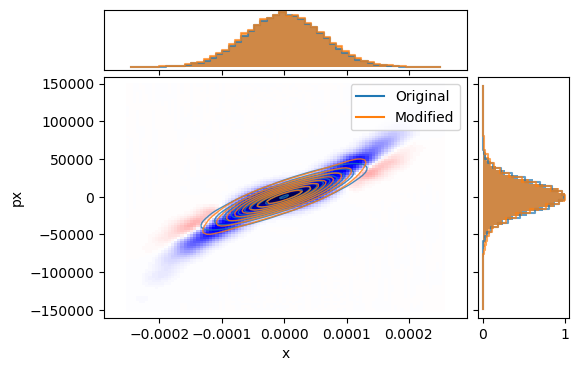

In [2]:
# Load example particle group (from OpenPMD-Beamphysics documentation)
pg1 = ParticleGroup("data/bmad_particles.h5")
print(len(pg1))

# Produce a modified beam
pg2 = pg1.copy()
pg2.x = pg2.x * 1.05
pg2.px = pg2.px * 0.95
pg2.px += pg2.x**3 * 6e15

# Compare the two
joint_and_marginal_diff(pg1, pg2, "x", "px", label_a="Original", label_b="Modified")

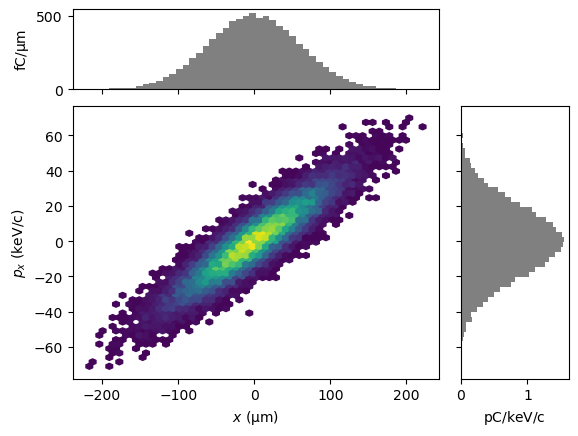

In [3]:
pg1.plot("x", "px")

/home/chris/Code/electronsandstuff/src/electronsandstuff/pmd_beamphysics/beam_diff.py:471: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


(<Figure size 1800x600 with 9 Axes>,
 {'x_px': {'joint': <Axes: title={'center': 'x vs px'}, xlabel='x', ylabel='px'>,
   'marginal_x': <Axes: >,
   'marginal_y': <Axes: >},
  'y_py': {'joint': <Axes: title={'center': 'y vs py'}, xlabel='y', ylabel='py'>,
   'marginal_x': <Axes: >,
   'marginal_y': <Axes: >},
  'delta_t_delta_energy': {'joint': <Axes: title={'center': 'delta_t vs delta_energy'}, xlabel='delta_t', ylabel='delta_energy'>,
   'marginal_x': <Axes: >,
   'marginal_y': <Axes: >}})

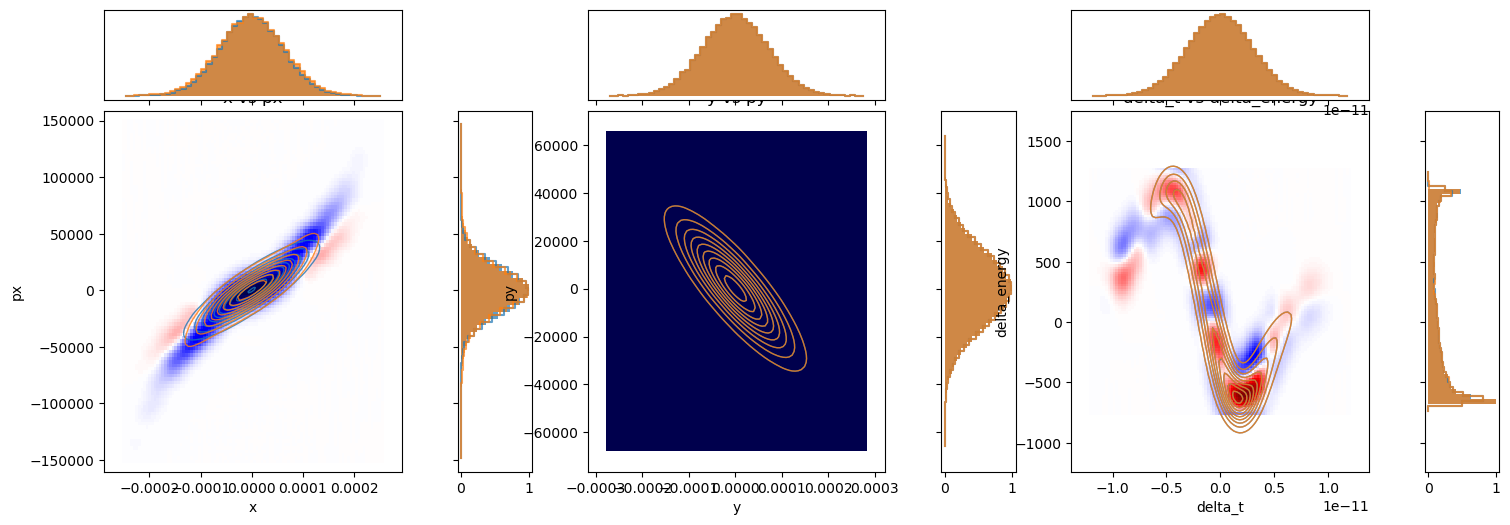

In [4]:
phase_space_diff(pg1, pg2)